# Laboratorio Práctico: Tránsito de exoplanetas
#### Editado y traducido Ludving Cano  (<lcanof@fcpn.edu.bo>)
Notas basadas en el curso de exoplanetas por Y. Gómez en ISYA 2023


Modelaremos las curvas de exoplanetas, nos enfocaremos en cómo los parámetros físicos de un exoplaneta influyen en esta curva de luz.



###  Librerías necesarias y paquetes

Usaremos batman [batman](https://lkreidberg.github.io/batman/docs/html/index.html)
para crear el modelo de la curva de luz

Respecto a la convención de unidades, usaremos la resolución de IAU en 2015. [(Prsa et al. 2016)](https://ui.adsabs.harvard.edu/abs/2016AJ....152...41P/abstract)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%pip install batman-package
import batman                                   # transit model
from astropy.constants import iau2015 as const  # astronomical constants

### Creando el modelo `exoplanet` en batman
(1) Empezaremos creando el modelo que contiene los parámetros físicos (de la estrella y el planeta) que vamos a modelar. Y lo almacenaremos en la variable `exoplanet`.

Los valores para este ejemplo son del exoplaneta [HD 209458 b](http://exoplanet.eu/catalog/hd_209458_b/), que fue el primer exoplaneta en ser medido por su curva de luz ([Charbonneau et al 2000](https://ui.adsabs.harvard.edu/abs/2000ApJ...529L..45C/abstract)).

In [22]:
## SI ESTÁN USANDO SU NUBE DE GOOGLE DRIVE, CORRER ESTA CELDA Y DARLE ACCESO
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
## ADEMÁS, COLOCAR AQUÍ LA RUTA DONDE QUIEREN QUE SE GUARDE TODO
route = '/content/drive/MyDrive/PROJ2023/astroclub/2_2023/lectures/exoplanets_lab'

In [24]:
exoplanet = batman.TransitParams()

(2) Establecemos los parámetros que no cambiaremos en todo este laboratorio en el exoplaneta exoplanet. Se mantendrán fijos a lo largo de este ejemplo.

In [25]:
exoplanet.limb_dark = "nonlinear"        #  stellar limb-darkening coefficients
exoplanet.u = [0.5, 0.1, 0.1, -0.1]

(3) Establecemos el **tiempo medio de tránsito** en exoplanet, lo que significa el momento (en unidades de días julianos) en el cual ocurre la mitad del tránsito.

In [26]:
exoplanet.t0 =  2453344.76824            # time of mid-transit (tiempo medio de tránsito) (julian days)

(4) Establecemos el **período orbital** en exoplanet, que es el tiempo que el exoplaneta tarda en orbitar su estrella o el tiempo entre tránsitos consecutivos. Las unidades del período orbital son días.

In [27]:
exoplanet.per = 3.52472                  # orbital period (days)

(5) Establecemos el **ángulo de inclinación** de la órbita planetaria con respecto a la línea de visión.

In [28]:
exoplanet.inc = 86.59              # orbital inclination (degrees)

(6) Establecemos en exoplanet la **excentricidad** y **orientación orbital** del planeta (a través del ángulo de periastron).

In [29]:
exoplanet.ecc =  0.0082            # eccentricity
exoplanet.w = 43.8                 # angle of periastron (degrees)

(7) Definimos una variable independiente para el **radio de la estrella anfitriona** en unidades de radios solares.

In [30]:
r_st = 1.203                        # radius of the host star (R_sun: solar radii)

(8) Definimos una variable independiente para el **radio del planeta** en radios de Júpiter.

In [31]:
r_pl = 1.38                         # planet radius (R_jup: Jupiter radii)

(9) Establecemos en exoplanet el radio del planeta en unidades de la estrella anfitriona utilizando las dos variables independientes definidas en (7) y (8).

Es importante destacar que estamos utilizando la Resolución B2 2015 de la IAU para tener los valores más precisos.

In [32]:
exoplanet.rp = r_pl*const.R_jup/(r_st*const.R_sun)        #Para actualizar el modelo.
print(exoplanet.rp)

0.11788238187053567


(10) Definimos una variable independiente para el semieje mayor de la órbita planetaria en unidades de ua (unidades astronómicas). Por ejemplo, la órbita de la Tierra tiene un semieje mayor de 1 ua y la de Júpiter de 5.2 ua.

Y convertimos la variable independiente utilizando las constantes de la IAU.

In [33]:
a_au = 0.04747                      #Semi-major axis (ua)
a_rsun = a_au*const.au/const.R_sun  #Semi-major axis (R_sun)

(11) Establecemos en exoplanet el semieje mayor en unidades del radio estelar, utilizando las variables definidas en (10).

In [34]:
exoplanet.a =  a_rsun/r_st         #Semi-major axis (in host stellar radius)

### Para crear la curva de luz del modelo de tránsito, necesitamos:
 - El modelo basado en las propiedades físicas definidas en `exoplanet`
 - Los momentos en los que se calculará el modelo de la curva de luz
 - El flujo en la curva de luz

In [35]:
times = np.linspace(exoplanet.t0-0.15, exoplanet.t0+0.15, 1000)  #times at which the light curve will be calculated


model = batman.TransitModel(exoplanet, times)    # creating the model of the transit at the given times


flux = model.light_curve(exoplanet)              # calculates the model transit light curve

### Para crear un gráfico de la curva de luz del tránsito y guardar la figura:

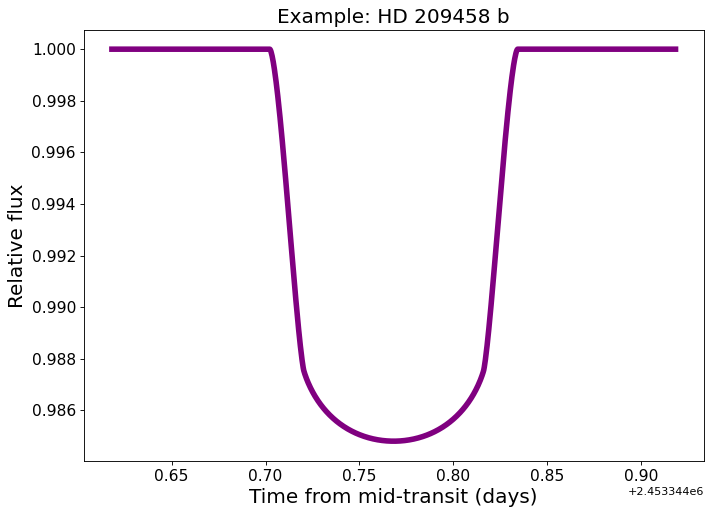

In [36]:
plt.figure(figsize=(10,7), dpi=80)              # Set the size and resolution of the graph

plt.plot(times, flux, color = "purple", linewidth =5)       # Make the plot

plt.title('Example: HD 209458 b', fontsize=18)  # Set the title of the graph
plt.xlabel("Time from mid-transit (days)",fontsize=18)           # Set the title and font size of x-axis title
plt.ylabel("Relative flux",fontsize=18)         # Set the title and font size of y-axis title
plt.xticks(fontsize=14)                         # Set the font size of the numbers in the x-axis
plt.yticks(fontsize=14)                         # Set the font size of the numbers in the y-axis

#plt.show()                                      # Show the graph in this notebook

plt.savefig(f'{route}/hd209548_transit.pdf')            # Save the image as a pdf

### Para guardar la curva de luz del modelo de tránsito como un archivo de texto:

In [40]:
filename = f'{route}/d209458_lc.txt'             # define name to save file to, it may include a full path

In [41]:
np.savetxt(filename,np.vstack((times,flux)).T,fmt="%.8f,%.4f")

### Para leer la curva de luz del modelo desde un archivo de texto y cargarla en una variable numpy:

In [44]:
file = open(f"{route}/d209458_lc.txt")       #Open the file with the saved model light curve


times_1 = []                         #Array where the times of the light curve will be
flux_1 = []                          #Array where the fluxes of the light curve will be

for line in file:                   #This loop reads every line and assigns a value to each array.
    x,y = line.split(',')
    times_1 += [float(x)]
    flux_1 += [float(y)]

file.close()

## Has llegado al final de este Cuaderno de Jupyter y deberías tener todas las herramientas que necesitas para el resto del laboratorio.